In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Filepath ('.' = current directory)
path = 'Data'
os.chdir(path)

In [6]:
# Assign data types for import
jpg = 'jpg'

# Create list of files
files = [i for i in glob.glob('*.{}'.format(jpg))]

In [7]:
from skimage import io

image = io.imread(files[1])

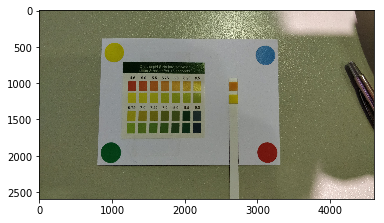

In [8]:
plt.imshow(image)

In [10]:
array = [[[174,156,109],
        [ 19,37,154],
        [38,98,14],
        [7,176,184]]]

In [14]:
new_array = np.array(array)

In [38]:
yellow = [255,255,0]
blue = [65,105,225]
green = [50,205,50]
red = [255,0,0]

In [41]:
templ = [[yellow,
         blue,
         green,
         red]]

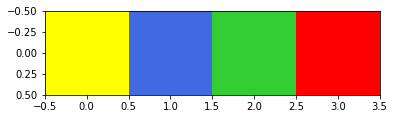

In [45]:
plt.imshow(templ)

In [53]:
photo = [[109,156,174],
            [154,37,19],
            [14,98,19],
            [184,176,7]]

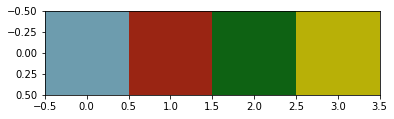

In [37]:
plt.imshow(photo)

In [54]:
for i in photo:
    print(i)

[109, 156, 174]
[154, 37, 19]
[14, 98, 19]
[184, 176, 7]


In [57]:
pH_list = [4.5, 5.0, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.25, 8.0, 8.5, 9.0]

In [91]:
scale = [[[166, 67, 33], [170, 89, 33], [177, 111, 33], [177, 127, 38], [183, 149, 43], [176, 146, 34], [180, 162, 36]], [[185, 180, 27], [180, 177, 24], [176, 176, 28], [162, 166, 29], [150, 159, 29], [151, 158, 29], [131, 140, 31]], [[172, 165, 31], [151, 139, 27], [139, 132, 27], [109, 113, 37], [98, 110, 45], [34, 65, 33], [57, 72, 65]], [[136, 154, 44], [115, 136, 41], [94, 126, 42], [79, 111, 38], [60, 89, 41], [29, 70, 36], [35, 46, 50]]]

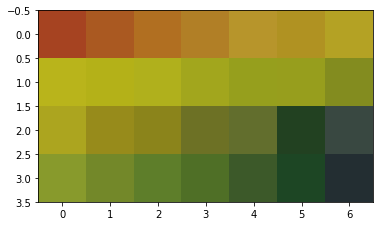

In [112]:
plt.imshow(scale)

In [160]:
measurement = [[[94, 116, 35], [86, 111, 24]]]

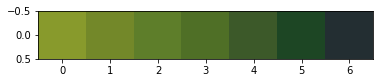

In [170]:
plt.imshow([scale[3]])

In [166]:
scale[1]

[[185, 180, 27],
 [180, 177, 24],
 [176, 176, 28],
 [162, 166, 29],
 [150, 159, 29],
 [151, 158, 29],
 [131, 140, 31]]

In [178]:
for i in scale[2]:
    for j in measurement[0]:
        result = np.sum(np.abs(np.array(i) - np.array(j)))

In [181]:
scale[2]

[[172, 165, 31],
 [151, 139, 27],
 [139, 132, 27],
 [109, 113, 37],
 [98, 110, 45],
 [34, 65, 33],
 [57, 72, 65]]

In [180]:
print(scale_top)

[57 72 65]
